## Imports

In [ ]:
import numpy as np
import pandas as pd

from pprint import pprint

import datetime
import time

from google.colab import files
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)

from geopy.distance import geodesic
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs

import nltk
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import string

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True) #allows to work in a notebook
cf.go_offline() #allows cufflinks to work offline

import plotly.graph_objs as go

import datetime





## Functions Set-up

In [ ]:
def plot_with_names_lines(x, y, df):
  plt.figure(figsize=(6, 6))
  g = sns.relplot(x = f'{x}', y=f'{y}', kind="line", data=df)

  g.fig.autofmt_xdate()
  plt.title(f'Correlation between {x} and {y}')

def plot_with_names_scatter(x, y, df, hue = None):
  fig, ax = plt.subplots()
  # the size of A4 paper
  fig.set_size_inches(11.7, 8.27)
  sns.scatterplot(ax= ax, x = f'{x}', y=f'{y}', data=df, hue = hue)


  plt.title(f'Correlation between {x} and {y}')


# squared_loss

def rmse_cv(kf, model, X_train, y_train):
    #kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(X_20_feat)
    return np.sqrt( - cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf))

## Reading the Dataset

### AirBnb data

In [ ]:
df_air = pd.read_csv("drive/My Drive/Colab Notebooks/Open AirBnb data/Open_Airbnb_ver.1.csv")
df_air.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Listing_Location,Distance_to_closest_station,Closest_station
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,"(40.647490000000005, -73.97237)",0.243698,Fort Hamilton Parkway
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,"(40.75362, -73.98376999999999)",0.053191,42nd St
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,"(40.809020000000004, -73.9419)",0.191590,125th St
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,"(40.685140000000004, -73.95976)",0.250325,Classon Av
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,"(40.79851, -73.94399)",0.110581,116th St
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,"(40.74767, -73.975)",0.219536,Grand Central-42nd St
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,"(40.68688, -73.95596)",0.172385,Bedford-Nostrand Avs
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,"(40.76489, -73.98493)",0.135616,59th St
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,"(40.80178, -73.96723)",0.151204,Cathedral Parkway-110th St
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,"(40.713440000000006, -73.99037)",0.037193,East Broadway


### Most Visited Tourist Attractions

Regularly AirBnb is used by tourists, and it is important to look through customer considerations in order to come up with the most useful features.
The original dataset offers very limited information, that would be used by customers, while deciding which listing to choose and what price to pay. Usually customer comes to the website with a vague idea of price they are willing to pay and recieve influence of price ranges on the website. There customer would go through a trade off process: which features of the listing they value most.
This dataset provided the most important peace of information - location coordinates, with which the customer would go to Google maps to run a number of searches: "How far is X from this place?"

Let's try to guess the nature of searches, which customer may perform and make them as well.

In [ ]:
attract = pd.read_html('https://en.wikipedia.org/wiki/Tourism_in_New_York_City')[1]
attract.head(20)


,Name,Image,Location,Estimated number of visitors (millions),As of,Ref.
0,Central Park,NaN,"between 5th and 8th Aves, between W 59th and W...",42.0,2016,[22]
1,Times Square,NaN,Broadway and 7th Avenue between W 42nd and W 4...,39.5,2014,[23]
2,Grand Central Terminal,NaN,Park Ave between E 42nd and E 45th Sts 40°45′1...,21.6,2014,[23]
3,Theater District (including Broadway theatres),NaN,"between 6th and 8th Aves, between 40th and 54t...",13.0,2018,[24]
4,Rockefeller Center (including Top of the Rock),NaN,"between 5th and 6th Aves, between W 48th and W...",12.8,2018,[24]
5,Bryant Park,NaN,"between 5th and 6th Aves, between W 40th and W...",12.0,2017,[25]
6,Prospect Park,NaN,"between 8th, Flatbush, Ocean, Parkside Aves, a...",10.0,2017,[26]
7,South Street Seaport,NaN,South St and Fulton St 40°42′22″N 74°0′12″W﻿ /...,9.0,2014,[23]
8,High Line,NaN,west of 10th Ave between Gansevoort and W 34th...,7.6,2015,[27]
9,Coney Island (including amusement parks and bo...,NaN,southern shore of Brooklyn 40°34′26″N 73°58′41...,7.4,2017,[28]


### Airports Used by New Yorkers and tourists

Proximity of an airport may be important for some people. People may choose airport based on AirBnb they have already found or wise-versa.

The following data set contains coordinates of three airports that most New Yorkers and tourists use. This dataset is based on information from NYC Government data; however, Wikipedia was used to add Newark Liberty International Airport. This airport is also widely used to reach NYC, since it is as close to Manhattan as JFK, so it is an important piece of information.

The_geom column was also manually modified to match the format expected by the Geodesic function

In [ ]:
df_airport = pd.read_excel("drive/My Drive/Colab Notebooks/Open AirBnb data/AIRPORT_POINT.xlsx")
df_airport.head(10)

,the_geom,NAME,URL
0,"(40.77816708075414, -73.87586383165385)",La Guardia Airport,http://www.panynj.gov/CommutingTravel/airports...
1,"(40.640120620653406, -73.7712935119941)",John F. Kennedy International Airport,http://www.panynj.gov/CommutingTravel/airports...
2,"(40.6895, -74.1745)",Newark Liberty International Airport,NaN


## Basic EDA

Columns vs column data

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Listing_Location', 'Distance_to_closest_station',
       'Closest_station'],
      dtype='object')

In [ ]:
df_air.shape[0]

48895

In [ ]:
neighb_groups = df_air['neighbourhood_group'].unique()

## Creating New Features

### Converting to Date Time

In [ ]:
df_air['last_review'] = pd.to_datetime(df_air['last_review'], format='%Y-%m-%d')

### Proximity to Key Attractions

Creating Latitude and Longitude columns and converting them into the format expected by Geodesic function

In [ ]:
attract['Latitude'] = np.zeros((attract.shape[0],1))
attract['Longitude'] = np.zeros((attract.shape[0],1))

for row in range(attract.shape[0]):
  loc = attract['Location'][row].split('/')[1][2:].split()
  attract.loc[row, 'Latitude'] = float(loc[0][:-2])
  attract.loc[row, 'Longitude'] = (-1)* float(loc[1][:-2])

attract.head(20)

,Name,Image,Location,Estimated number of visitors (millions),As of,Ref.,Latitude,Longitude
0,Central Park,NaN,"between 5th and 8th Aves, between W 59th and W...",42.0,2016,[22],40.782220,-73.965280
1,Times Square,NaN,Broadway and 7th Avenue between W 42nd and W 4...,39.5,2014,[23],40.757000,-73.986000
2,Grand Central Terminal,NaN,Park Ave between E 42nd and E 45th Sts 40°45′1...,21.6,2014,[23],40.752813,-73.977215
3,Theater District (including Broadway theatres),NaN,"between 6th and 8th Aves, between 40th and 54t...",13.0,2018,[24],40.759000,-73.985000
4,Rockefeller Center (including Top of the Rock),NaN,"between 5th and 6th Aves, between W 48th and W...",12.8,2018,[24],40.758610,-73.979170
5,Bryant Park,NaN,"between 5th and 6th Aves, between W 40th and W...",12.0,2017,[25],40.754000,-73.984000
6,Prospect Park,NaN,"between 8th, Flatbush, Ocean, Parkside Aves, a...",10.0,2017,[26],40.661670,-73.970830
7,South Street Seaport,NaN,South St and Fulton St 40°42′22″N 74°0′12″W﻿ /...,9.0,2014,[23],40.706110,-74.003330
8,High Line,NaN,west of 10th Ave between Gansevoort and W 34th...,7.6,2015,[27],40.747993,-74.004765
9,Coney Island (including amusement parks and bo...,NaN,southern shore of Brooklyn 40°34′26″N 73°58′41...,7.4,2017,[28],40.574000,-73.978000


Creating Column that would be passed to the Geodesic function

In [ ]:
attract['Geo_Location']=attract[['Latitude','Longitude']].apply(lambda x : (x['Latitude'],x['Longitude']),axis=1)

Creating features "Proximity to .." for every major attraction, that contains distance to every listing

In [ ]:
for feat in range(attract.shape[0]):
  loc_name = attract['Name'][feat]
  df_air[f'Proximity_to_{loc_name}'] = df_air['Listing_Location'].apply(lambda x : geodesic(x, attract['Geo_Location'][feat]).miles)

In [ ]:
df_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Listing_Location,Distance_to_closest_station,Closest_station,Proximity_to_Central Park,Proximity_to_Times Square,Proximity_to_Grand Central Terminal,Proximity_to_Theater District (including Broadway theatres),Proximity_to_Rockefeller Center (including Top of the Rock),Proximity_to_Bryant Park,Proximity_to_Prospect Park,Proximity_to_South Street Seaport,Proximity_to_High Line,Proximity_to_Coney Island (including amusement parks and boardwalk),Proximity_to_National September 11 Memorial,Proximity_to_Metropolitan Museum of Art,Proximity_to_Rockaway Beach,Proximity_to_American Museum of Natural History,Proximity_to_Statue of Liberty and Ellis Island,Proximity_to_Empire State Building,Proximity_to_National September 11 Museum,Proximity_to_Museum of Modern Art,Proximity_to_One World Trade Center
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,"(40.647490000000005, -73.97237)",0.243698,Fort Hamilton Parkway,9.304127,7.590246,7.271961,7.722960,7.675828,7.374748,0.981783,4.359636,7.140550,5.079521,4.929872,9.115092,9.439657,9.182961,4.915822,6.992564,4.894160,7.878624,5.016359
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,"(40.75362, -73.98376999999999)",0.053191,42nd St,2.198996,0.260937,0.348443,0.376803,0.420497,0.028865,6.381031,3.435331,1.168143,12.397787,3.291455,2.083368,14.670319,1.918613,5.149390,0.376916,3.275669,0.638761,3.207209
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,"(40.809020000000004, -73.9419)",0.191590,125th St,2.218800,4.270250,4.298090,4.125928,3.990090,4.392033,10.280284,7.798373,5.348503,16.327314,7.699562,2.326679,16.833187,2.611296,9.538596,4.773081,7.682704,3.769979,7.615800
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,"(40.685140000000004, -73.95976)",0.250325,Classon Av,6.705026,5.146311,4.758665,5.265950,5.170998,4.918971,1.720733,2.707364,4.938902,7.728516,3.368748,6.506537,10.350129,6.630877,4.419126,4.565814,3.314520,5.358402,3.421859
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,"(40.79851, -73.94399)",0.110581,116th St,1.584356,3.613889,3.602831,3.472765,3.314430,3.719916,9.546827,7.095592,4.723890,15.594284,7.018160,1.656295,16.219697,2.032616,8.880747,4.092030,6.999279,3.097522,6.936221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,"(40.67853, -73.94995)",0.120501,Nostrand Av,7.199975,5.735874,5.321838,5.849591,5.734703,5.505912,1.599021,3.388490,5.590806,7.361908,4.050522,6.994422,9.661961,7.159380,5.008119,5.166535,3.996829,5.912977,4.105477
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,"(40.701840000000004, -73.93316999999999)",0.293096,Morgan Av,5.796794,4.709295,4.209148,4.791497,4.601673,4.480351,3.405359,3.696031,4.926258,9.130458,4.278054,5.577608,10.220056,5.853264,5.795127,4.225478,4.220078,4.737397,4.294243
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,"(40.81475, -73.94866999999999)",0.150839,135th St,2.407739,4.439930,4.528497,4.292949,4.191118,4.583238,10.626751,8.0

### Proximity to Nearest Airport

The same procedure is used to determine the nearest airport as the nearest subway station

In [ ]:
# Distance between two points
df_air['Distance_to_closest_airport'] = np.zeros((df_air.shape[0],1))
df_air['Closest_airport'] = np.zeros((df_air.shape[0],1))


for air in range(df_air.shape[0]):
  min_dist = [9999,''] #creating a dummy distance, station name
  for port in range(df_airport.shape[0]):
    dist_to_check = geodesic(df_air['Listing_Location'][air], df_airport['the_geom'][port]).miles
    if dist_to_check < min_dist[0]:
      min_dist[0] = dist_to_check
      min_dist[1] = df_airport['NAME'][port]
  df_air.loc[air, 'Distance_to_closest_airport'] = min_dist[0]
  df_air.loc[air, 'Closest_airport'] = min_dist[1]

### Flag Potential Housing Agents vs Private Listings

As later plots would show, some hosts manage large quantity of listings, most of which are separate apartments or entire homes. Such distribution poses a question whether some of these hosts are potential agents. We shall create a flag feature that would mark hosts that have more than 5 listings

In [ ]:
freq = df_air['host_id'].value_counts()
frequent_values = freq[freq >= 5].index
df_air['Potential_Agent'] = df_air['host_id'].apply(lambda x : 1 if x in (frequent_values) else 0)

### Flag low/high availability

In [ ]:
df_air['all_year_avail'] = df_air['availability_365'].apply(lambda x : 1 if x >320 else 0)
df_air['low_avail'] = df_air['availability_365'].apply(lambda x : 1 if x <20 else 0)

## Plots

Distribution of prices show that the dataset has quite a large number of outliers. Especially on the upper price range. This data may skew future plots

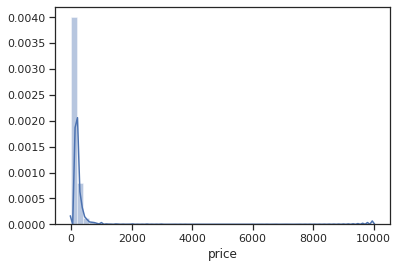

In [ ]:
sns.distplot(df_air['price']);

Next Step we should remove the outliers

In [ ]:
df_air = df_air[np.log1p(df_air['price']) < 6.75]
df_air = df_air[np.log1p(df_air['price']) > 3]

The following plot shows that the outliers were successfully removed

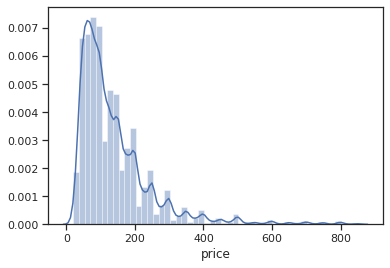

In [ ]:
sns.distplot(df_air['price']);

The followig plot shows that most of the dataset has 0-150 reviews, and there is a slight trend to cheaper/mid-range priced listings to be more reviewed. However, there is no visible direct correlation between number of reviews and price of the listing

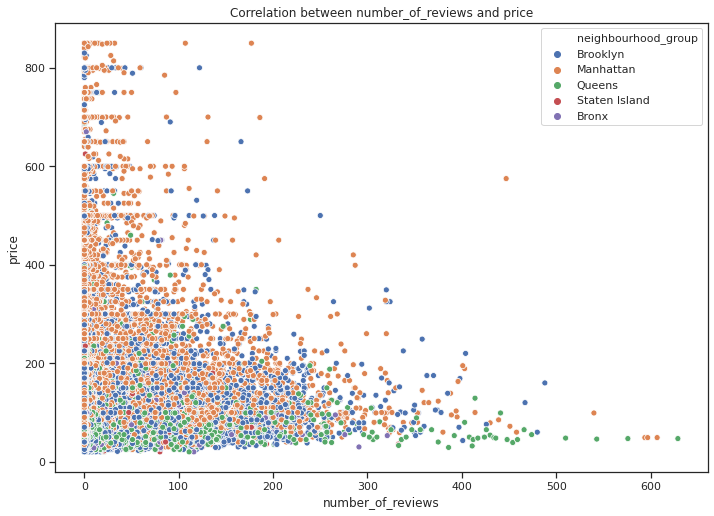

In [ ]:
plot_with_names_scatter('number_of_reviews', "price", df_air, hue = "neighbourhood_group")

The following plot shows that listings in Staten Island are more distant from subway, and there is indeed a strong trend of listings that are closest to a station to be more expensive

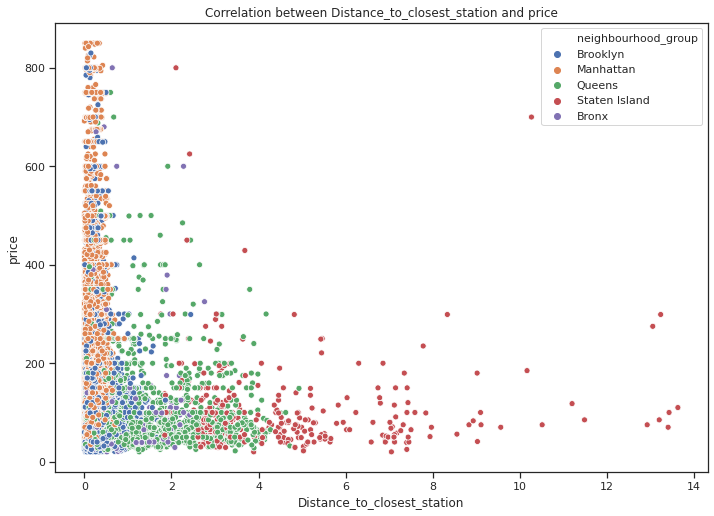

In [ ]:
plot_with_names_scatter('Distance_to_closest_station', "price", df_air, hue = "neighbourhood_group")


Most of listings tend to have fewer minimum night required. It is quite predictable as AirBnb is a short term housing, and many people rent their own homes when they go for vacations or weekend trips

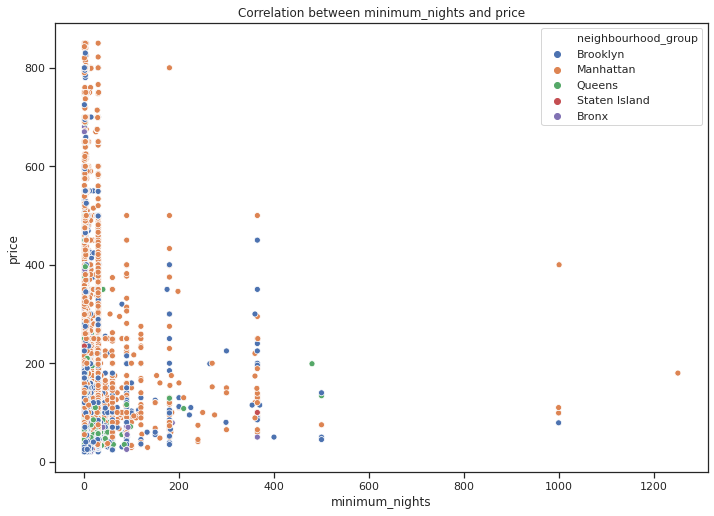

In [ ]:
plot_with_names_scatter('minimum_nights', "price", df_air, hue = "neighbourhood_group")

Text(0, 0.5, 'count')

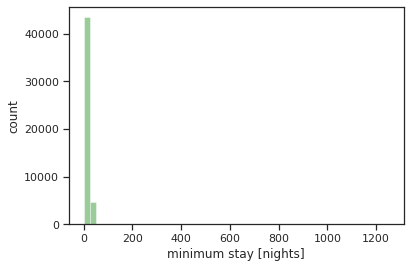

In [ ]:
sns.distplot(df_air['minimum_nights'], rug=False, kde=False, color="green")
plt.xlabel('minimum stay [nights]')
plt.ylabel('count')

Distribution plot below suggest that most of hosts has very low availability of their listings, potentially making places available as the host vacates their own places for a couple of days. Another end of the spectrum are some listings that are available all year around. It is an indication of potential business - an AirBnb dedicated house/apartment/room. That is the flag low/high availability

(0.0, 365.0)

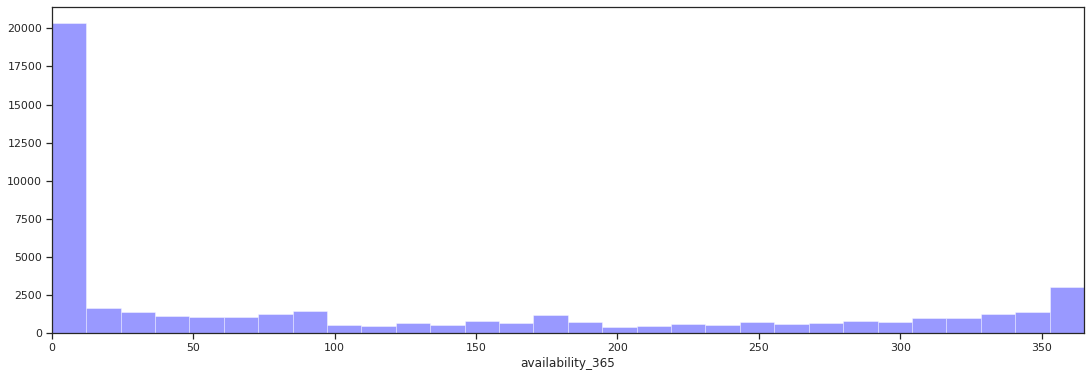

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(df_air['availability_365'], rug=False, kde=False, color="blue", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

Surprisingly, most of Brooklyn listings are quite far from any airport, which is surprising, since JFK is located in Brooklyn. 

It appears that people agree to pay more to not be too close to any airport, but yet not getting too far, so the distribution tends to rise up to the middle at 6.25 miles.

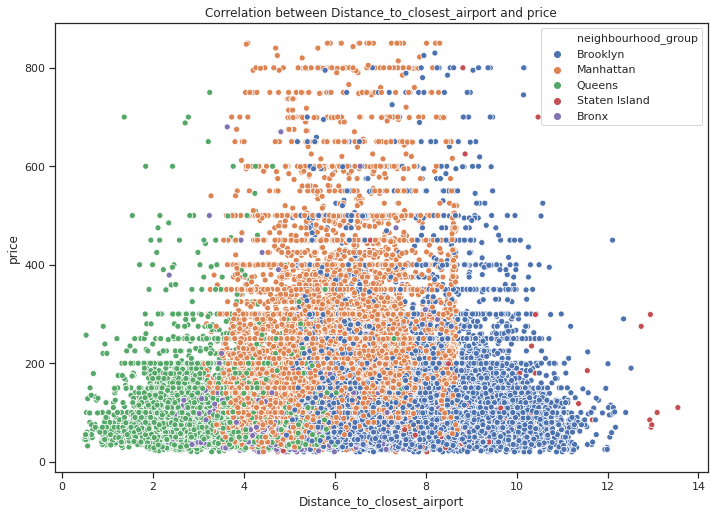

In [ ]:
plot_with_names_scatter('Distance_to_closest_airport', "price", df_air, hue = "neighbourhood_group")

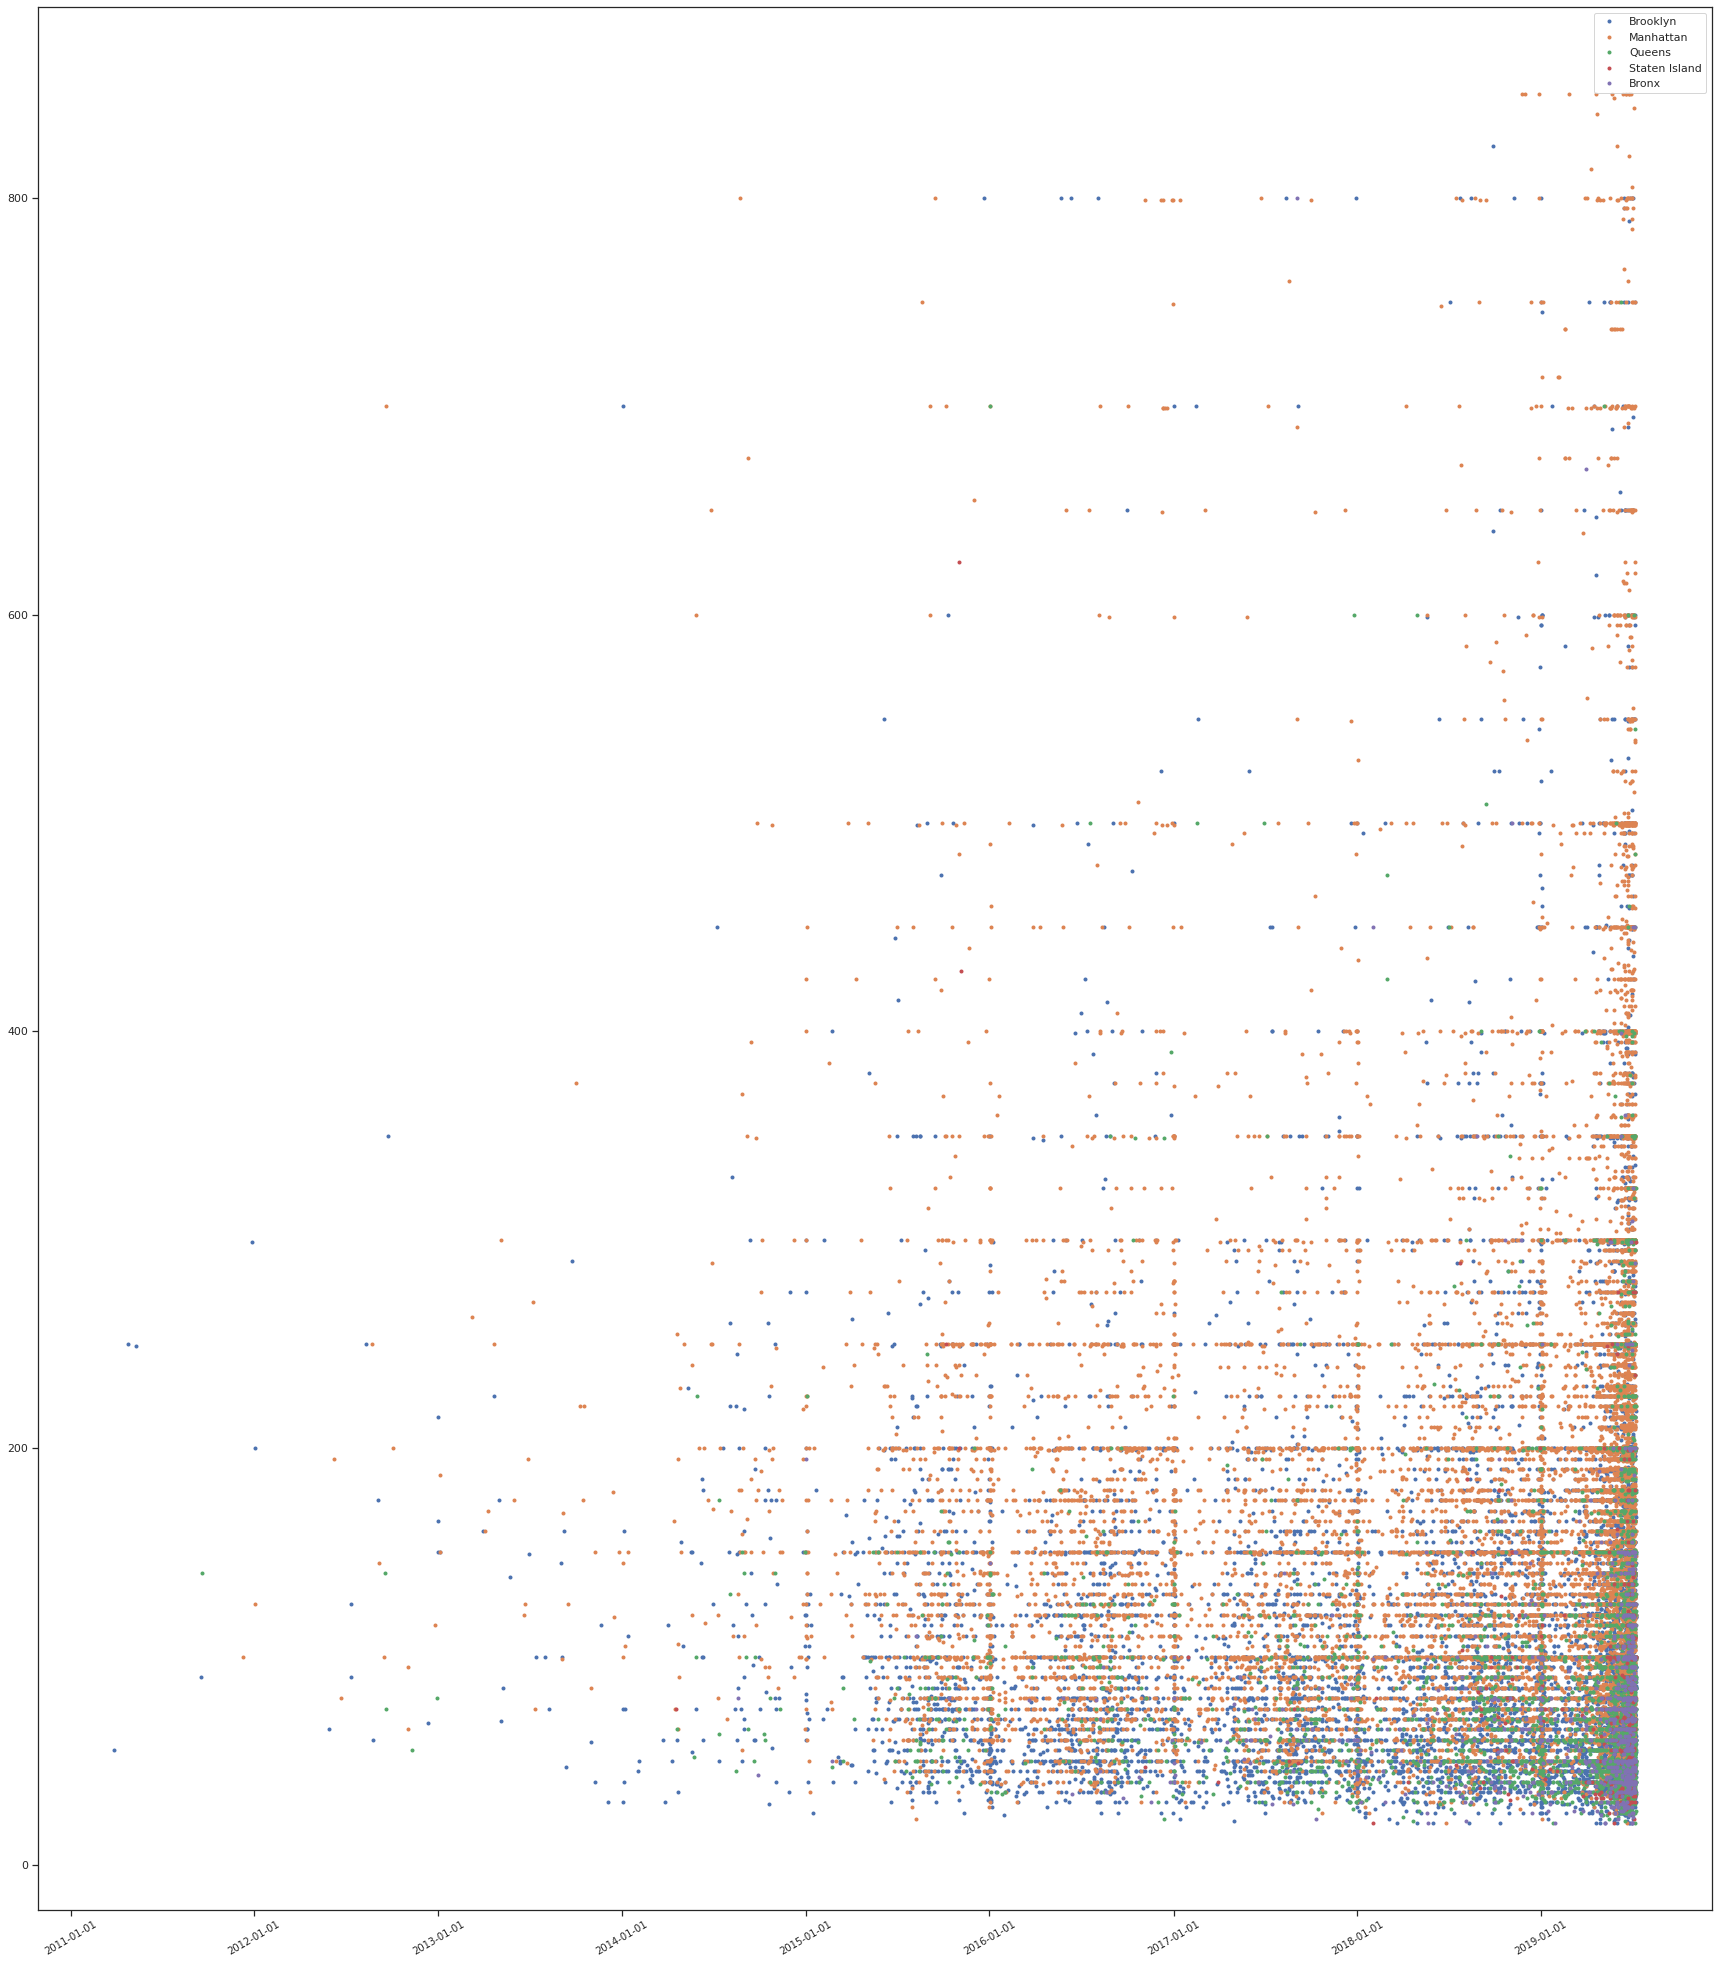

In [ ]:
df_air_nonan = df_air.dropna(subset=['last_review'])

formatter = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(30,35))

for group in neighb_groups:
  ax.plot_date(df_air_nonan[df_air_nonan['neighbourhood_group'] == f'{group}']['last_review'],
               df_air_nonan[df_air_nonan['neighbourhood_group'] == f'{group}']['price'], marker='o', markersize=2, mew=2, label=f'{group}')


ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.legend()
plt.show()

In [ ]:
df_air['last_review'].min()

Timestamp('2011-03-28 00:00:00')

### Correlation Matrix

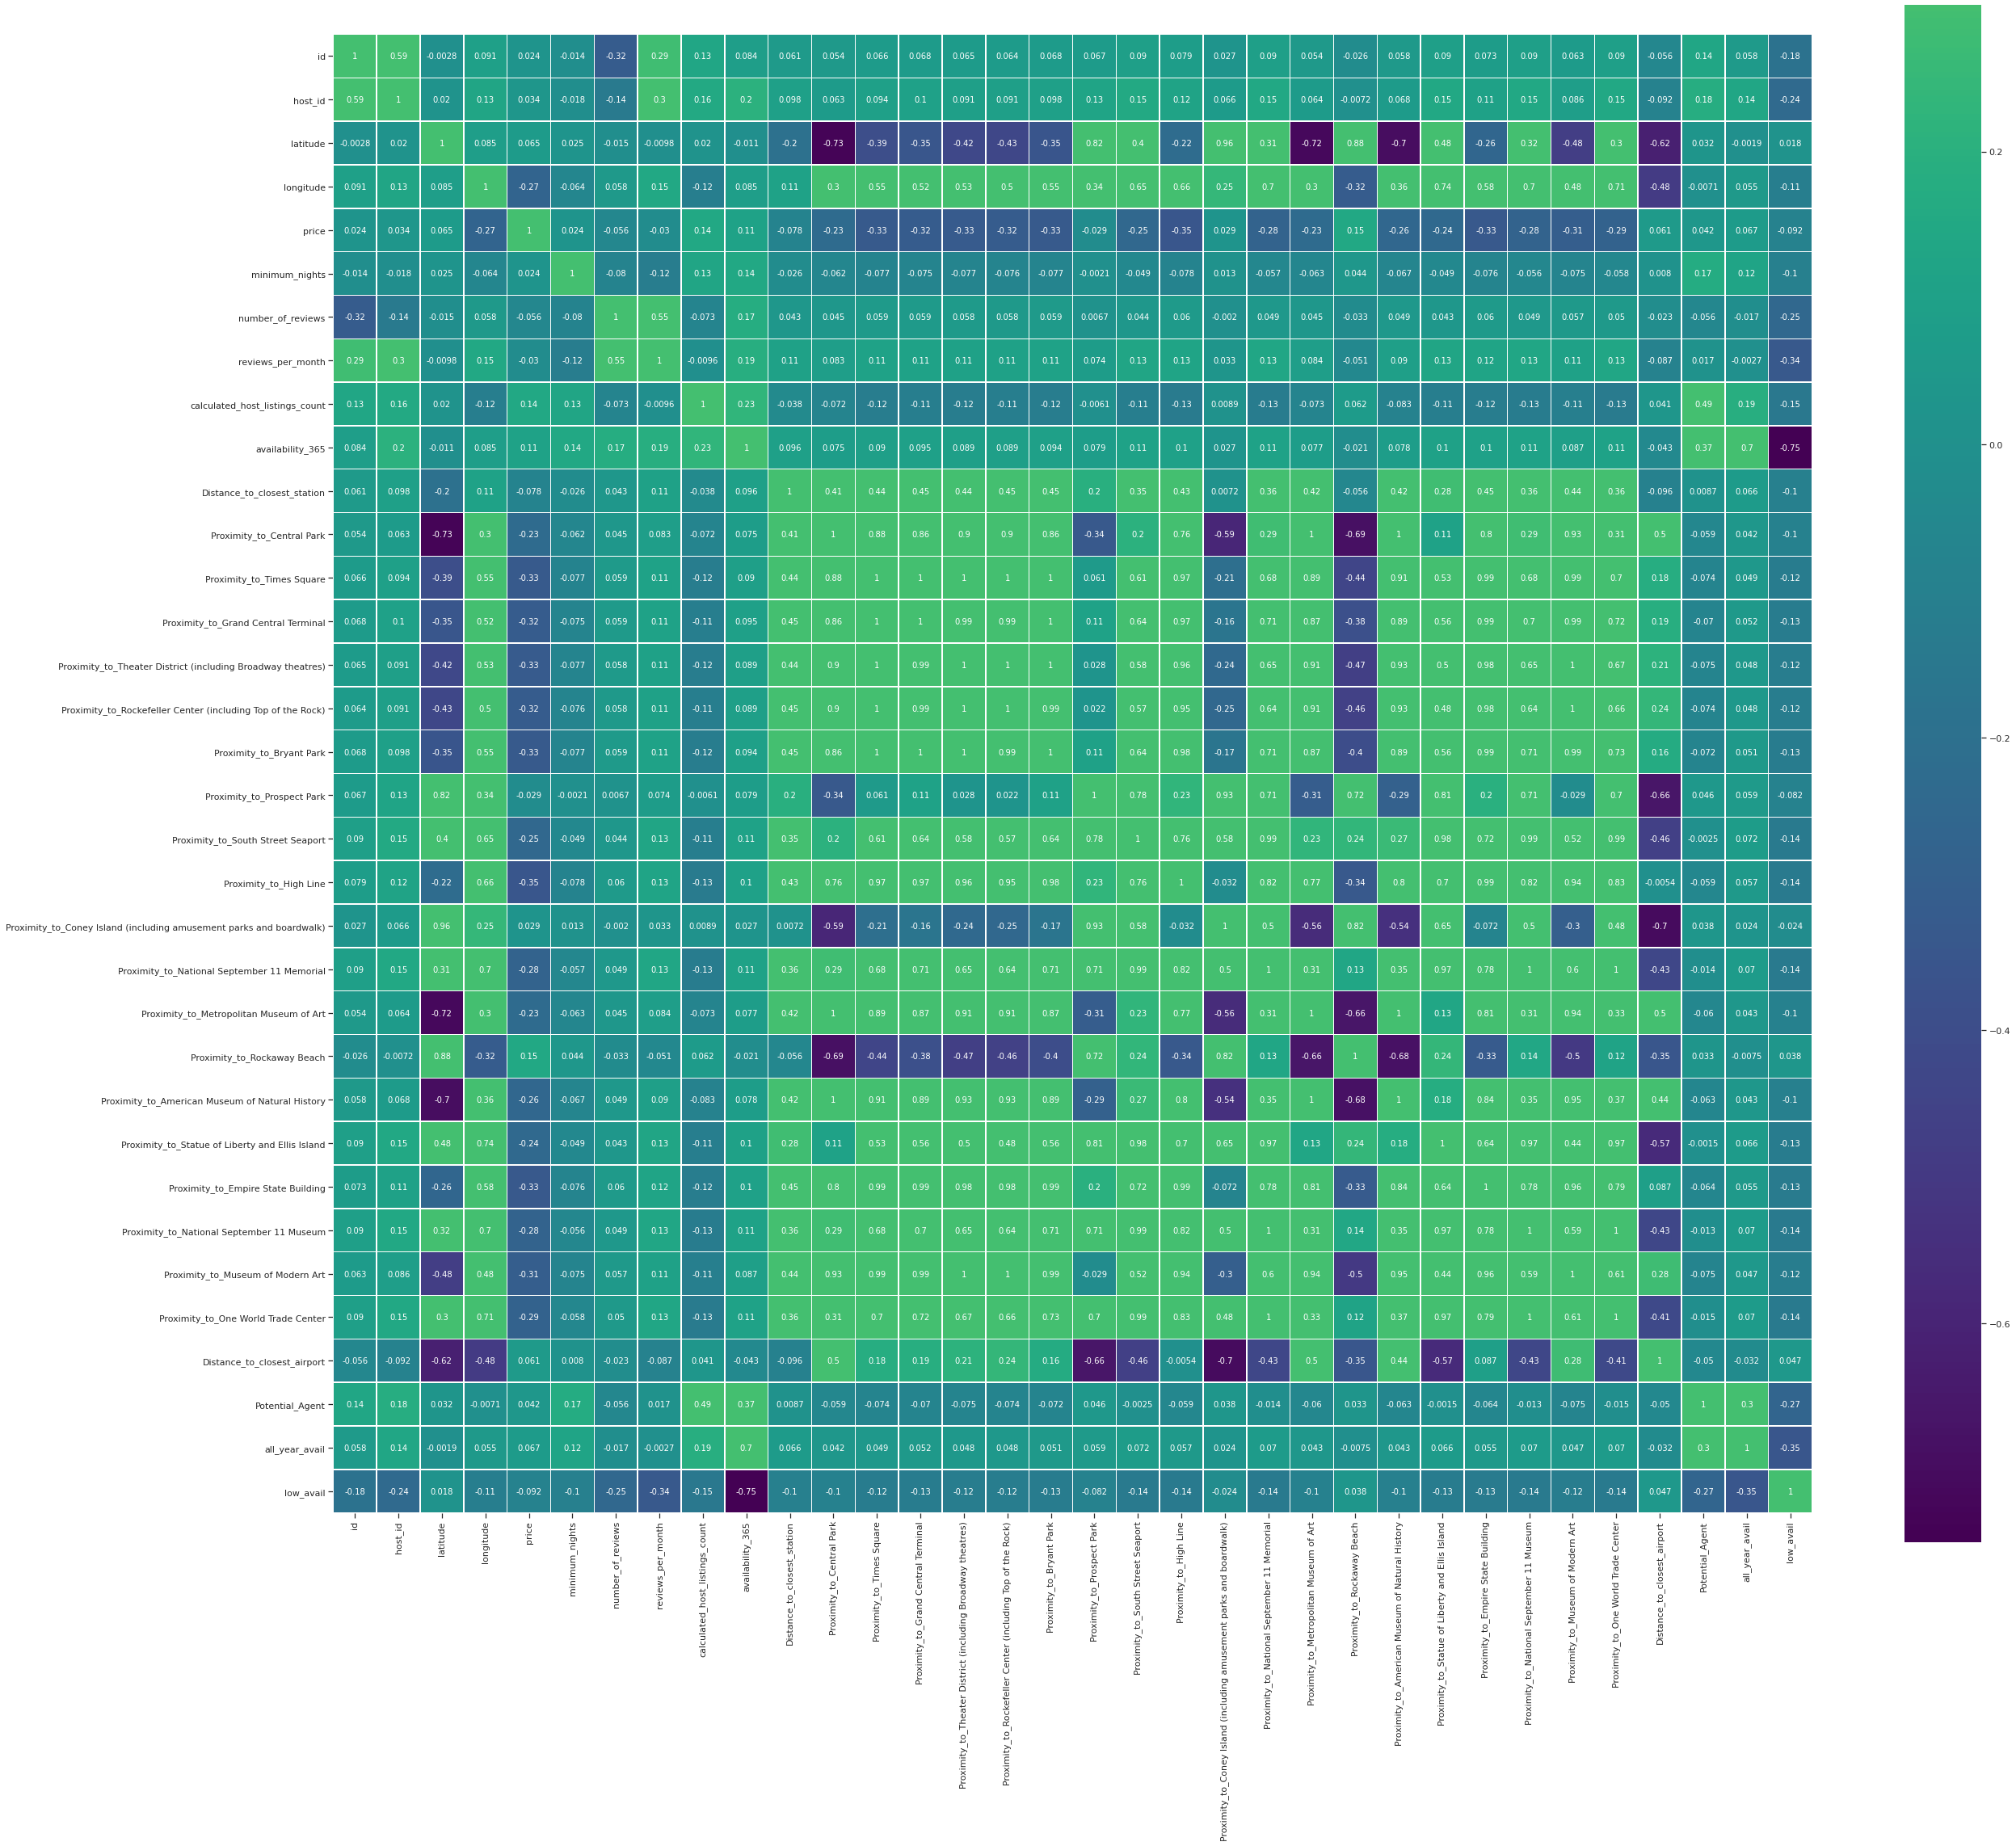

In [ ]:
# Compute the correlation matrix
dfa_corr = df_air.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(41, 70))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfa_corr, cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [ ]:
dfa_corr['price'].sort_values(ascending = False)

price                                                                  1.000000
Proximity_to_Rockaway Beach                                            0.151412
calculated_host_listings_count                                         0.144462
availability_365                                                       0.113630
all_year_avail                                                         0.066803
latitude                                                               0.065475
Distance_to_closest_airport                                            0.061227
Potential_Agent                                                        0.041851
host_id                                                                0.034068
Proximity_to_Coney Island (including amusement parks and boardwalk)    0.028893
id                                                                     0.024141
minimum_nights                                                         0.023759
Proximity_to_Prospect Park              

Looking at the heat map and the list of correlation above, we could see that there is little correlation among all the features in the dataset. The Price also does not direclty correlate with any other feature

### Pair Plot

In [ ]:
#g = sns.pairplot(df_air)

In [ ]:


#list_of_columns = ['Proximity_to_Central Park', 'Proximity_to_Times Square', 'Proximity_to_Grand Central Terminal', 'Proximity_to_Theater District (including Broadway theatres)',
#       'Proximity_to_Rockefeller Center (including Top of the Rock)', 'Proximity_to_Bryant Park', 'Proximity_to_Prospect Park', 'Proximity_to_South Street Seaport', 'Proximity_to_High Line', 
#       'Proximity_to_Coney Island (including amusement parks and boardwalk)', 'Proximity_to_National September 11 Memorial', 'Proximity_to_Metropolitan Museum of Art',
#       'Proximity_to_Rockaway Beach', 'Proximity_to_American Museum of Natural History', 'Proximity_to_Statue of Liberty and Ellis Island', 'Proximity_to_Empire State Building',
#       'Proximity_to_National September 11 Museum', 'Proximity_to_Museum of Modern Art', 'Proximity_to_One World Trade Center']

#fig, axs = plt.subplots(nrows = len(list_of_columns), figsize=(25,75))
#plt.subplots_adjust(hspace = 0.5)
#for figur in range(len(list_of_columns)):
#  sns.scatterplot(x=f'{list_of_columns[figur]}', y='price',hue = "neighbourhood_group", data=df_air, ax=axs[figur], legend = False)

#for i in range(0,len(list_of_columns)):
#  sns.scatterplot(df_air[f'{list_of_columns[i]}'], df_air['price'], hue = df_air["neighbourhood_group"])
  

### Detailed Plots

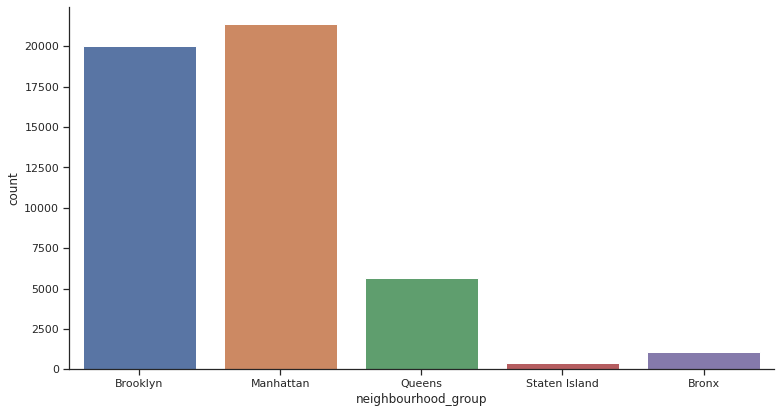

In [ ]:
sns.catplot(x='neighbourhood_group', kind='count' ,data=df_air)
fig = plt.gcf()
fig.set_size_inches(12, 6)

In [ ]:
num = df_air[df_air['neighbourhood_group']=='Staten Island'].shape[0]
print(f" Number of Staten Island listings: {num}")

 Number of Staten Island listings: 369


This countplot helps us see distribution of listings among five boroughs of New York City. Bronx and Staten Island are very under-represented on this website that may potentially skew the correlation due to smaller sample size

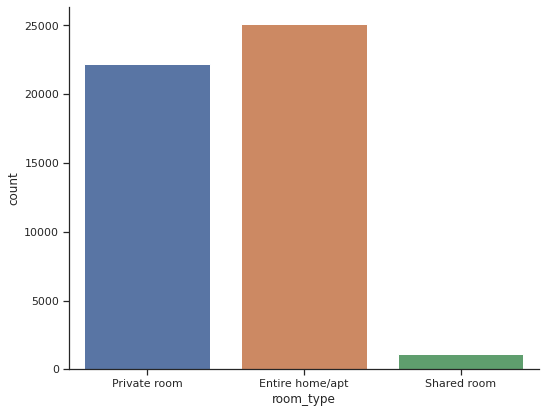

In [ ]:
sns.catplot(x='room_type', kind='count' ,data=df_air)
fig = plt.gcf()
fig.set_size_inches(8, 6)

In [ ]:
num = df_air[df_air['room_type']=='Shared room'].shape[0]
print(f" Number of Shared Room listings: {num}")

 Number of Shared Room listings: 1140


The plot above shows that Shared Rooms are not as popular as other types of listings. People tend to rent out private Rooms or Entire homes/apartments. 

The entire home/apartment could potentially hide housing business owner, as opposed to private listings.

In [ ]:
df_air['host_id'].value_counts()

219517861    327
107434423    232
30283594     118
137358866    103
12243051      96
            ... 
28940517       1
5479559        1
322697         1
95485067       1
1288080        1
Name: host_id, Length: 37145, dtype: int64

Let's investigate the host 219517861. This host has 318 listings, we would like to find out what kind of room types this host has.

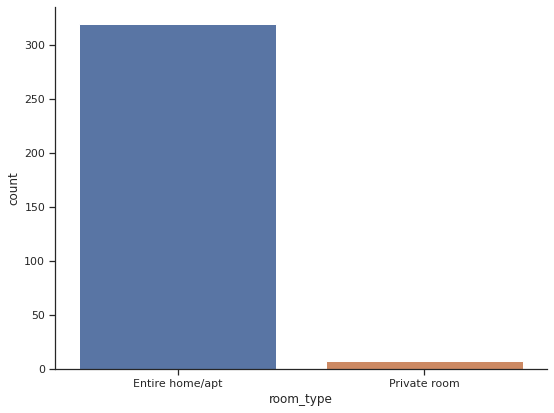

In [ ]:
sns.catplot(x='room_type', kind='count' ,data=df_air[df_air['host_id']== 219517861])
fig = plt.gcf()
fig.set_size_inches(8, 6)

looking at such distribution, we could dare to assume that this host is not a private individual renting out their place, but an agent or property manager. In current study, we agree to assign "An agent" flag to every host that has more than 5 listings

## Data Preprocessing

In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Listing_Location', 'Distance_to_closest_station',
       'Closest_station', 'Proximity_to_Central Park',
       'Proximity_to_Times Square', 'Proximity_to_Grand Central Terminal',
       'Proximity_to_Theater District (including Broadway theatres)',
       'Proximity_to_Rockefeller Center (including Top of the Rock)',
       'Proximity_to_Bryant Park', 'Proximity_to_Prospect Park',
       'Proximity_to_South Street Seaport', 'Proximity_to_High Line',
       'Proximity_to_Coney Island (including amusement parks and boardwalk)',
       'Proximity_to_National September 11 Memorial',
       'Proximity_to_Metropolitan Museum of Art',
       'Proximity_to_Rockaway Beach',
       'Proximity_to_American Museu

In [ ]:

X_prep = df_air[['neighbourhood_group',
       'neighbourhood',
       'room_type',
       'minimum_nights',
       'number_of_reviews',
       'last_review',
       'reviews_per_month',
       'calculated_host_listings_count',
       'availability_365',
       'Distance_to_closest_station',
       'Distance_to_closest_airport',
       'Proximity_to_Central Park',
       'Proximity_to_Times Square',
       'Proximity_to_Grand Central Terminal',
       'Proximity_to_Theater District (including Broadway theatres)',
       'Proximity_to_Rockefeller Center (including Top of the Rock)',
       'Proximity_to_Bryant Park',
       'Proximity_to_Prospect Park',
       'Proximity_to_South Street Seaport',
       'Proximity_to_High Line',
       'Proximity_to_Coney Island (including amusement parks and boardwalk)',
       'Proximity_to_National September 11 Memorial',
       'Proximity_to_Metropolitan Museum of Art',
       'Proximity_to_Rockaway Beach',
       'Proximity_to_American Museum of Natural History',
       'Proximity_to_Statue of Liberty and Ellis Island',
       'Proximity_to_Empire State Building',
       'Proximity_to_National September 11 Museum',
       'Proximity_to_Museum of Modern Art',
       'Proximity_to_One World Trade Center',
       'Potential_Agent',
       'all_year_avail',
       'low_avail',
       'price'
       ]]
#y = df_air[['price']]
#y = np.array(y)


In [ ]:
X_prep.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Distance_to_closest_station,Distance_to_closest_airport,Proximity_to_Central Park,Proximity_to_Times Square,Proximity_to_Grand Central Terminal,Proximity_to_Theater District (including Broadway theatres),Proximity_to_Rockefeller Center (including Top of the Rock),Proximity_to_Bryant Park,Proximity_to_Prospect Park,Proximity_to_South Street Seaport,Proximity_to_High Line,Proximity_to_Coney Island (including amusement parks and boardwalk),Proximity_to_National September 11 Memorial,Proximity_to_Metropolitan Museum of Art,Proximity_to_Rockaway Beach,Proximity_to_American Museum of Natural History,Proximity_to_Statue of Liberty and Ellis Island,Proximity_to_Empire State Building,Proximity_to_National September 11 Museum,Proximity_to_Museum of Modern Art,Proximity_to_One World Trade Center,Potential_Agent,all_year_avail,low_avail,price
0,Brooklyn,Kensington,Private room,1,9,2018-10-19,0.21,6,365,0.243698,10.343208,9.304127,7.590246,7.271961,7.722960,7.675828,7.374748,0.981783,4.359636,7.140550,5.079521,4.929872,9.115092,9.439657,9.182961,4.915822,6.992564,4.894160,7.878624,5.016359,1,1,0,149
1,Manhattan,Midtown,Entire home/apt,1,45,2019-05-21,0.38,2,355,0.053191,5.909123,2.198996,0.260937,0.348443,0.376803,0.420497,0.028865,6.381031,3.435331,1.168143,12.397787,3.291455,2.083368,14.670319,1.918613,5.149390,0.376916,3.275669,0.638761,3.207209,0,1,0,225
2,Manhattan,Harlem,Private room,3,0,NaT,NaN,1,365,0.191590,4.065125,2.218800,4.270250,4.298090,4.125928,3.990090,4.392033,10.280284,7.798373,5.348503,16.327314,7.699562,2.326679,16.833187,2.611296,9.538596,4.773081,7.682704,3.769979,7.615800,0,1,0,150
3,Brooklyn,Clinton Hill,Entire home/apt,1,270,2019-07-05,4.64,1,194,0.250325,7.784468,6.705026,5.146311,4.758665,5.265950,5.170998,4.918971,1.720733,2.707364,4.938902,7.728516,3.368748,6.506537,10.350129,6.630877,4.419126,4.565814,3.314520,5.358402,3.421859,0,0,0,89
4,Manhattan,East Harlem,Entire home/apt,10,9,2018-11-19,0.10,1,0,0.110581,3.838803,1.584356,3.613889,3.602831,3.472765,3.314430,3.719916,9.546827,7.095592,4.723890,15.594284,7.018160,1.656295,16.219697,2.032616,8.880747,4.092030,6.999279,3.097522,6.936221,0,0,1,80


In [ ]:
# neighbourhood_group dummies

# Get one hot encoding of columns B
one_hot = pd.get_dummies(X_prep['neighbourhood_group'])
# Drop column B as it is now encoded
X_prep = X_prep.drop('neighbourhood_group',axis = 1)
# Join the encoded df
X_prep = X_prep.join(one_hot)
# avoid dummy variable trap
X_prep = X_prep.drop('Staten Island',axis = 1)  


# room_type dummies

# Get one hot encoding of columns B
one_hot = pd.get_dummies(X_prep['room_type'])
# Drop column B as it is now encoded
X_prep = X_prep.drop('room_type',axis = 1)
# Join the encoded df
X_prep = X_prep.join(one_hot)
# avoid dummy variable trap
X_prep = X_prep.drop('Private room',axis = 1)
  

# neighborhood dummies

# Get one hot encoding of columns B
one_hot = pd.get_dummies(X_prep['neighbourhood'])
# Drop column B as it is now encoded
X_prep = X_prep.drop('neighbourhood',axis = 1)
# Join the encoded df
X_prep = X_prep.join(one_hot)
# avoid dummy variable trap
X_prep = X_prep.drop('Harlem',axis = 1)


nat_type_ob = type(X_prep['last_review'][44889])

X_prep['Reviews'] = X_prep['last_review'].apply(lambda x : 0 if type(x) == nat_type_ob else 1)
X_prep['reviews_per_month'] = X_prep['reviews_per_month'].fillna(0)
X_prep = X_prep.drop('last_review',axis = 1)
X_prep.reset_index(inplace=True, drop=True)
X_prep

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Distance_to_closest_station,Distance_to_closest_airport,Proximity_to_Central Park,Proximity_to_Times Square,Proximity_to_Grand Central Terminal,Proximity_to_Theater District (including Broadway theatres),Proximity_to_Rockefeller Center (including Top of the Rock),Proximity_to_Bryant Park,Proximity_to_Prospect Park,Proximity_to_South Street Seaport,Proximity_to_High Line,Proximity_to_Coney Island (including amusement parks and boardwalk),Proximity_to_National September 11 Memorial,Proximity_to_Metropolitan Museum of Art,Proximity_to_Rockaway Beach,Proximity_to_American Museum of Natural History,Proximity_to_Statue of Liberty and Ellis Island,Proximity_to_Empire State Building,Proximity_to_National September 11 Museum,Proximity_to_Museum of Modern Art,Proximity_to_One World Trade Center,Potential_Agent,all_year_avail,low_avail,price,Bronx,Brooklyn,Manhattan,Queens,Entire home/apt,Shared room,Allerton,Arden Heights,Arrochar,Arverne,...,South Slope,Springfield Gardens,Spuyten Duyvil,St. Albans,St. George,Stapleton,Stuyvesant Town,Sunnyside,Sunset Park,Theater District,Throgs Neck,Todt Hill,Tompkinsville,Tottenville,Tremont,Tribeca,Two Bridges,Unionport,University Heights,Upper East Side,Upper West Side,Van Nest,Vinegar Hill,Wakefield,Washington Heights,West Brighton,West Farms,West Village,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Reviews
0,1,9,0.21,6,365,0.243698,10.343208,9.304127,7.590246,7.271961,7.722960,7.675828,7.374748,0.981783,4.359636,7.140550,5.079521,4.929872,9.115092,9.439657,9.182961,4.915822,6.992564,4.894160,7.878624,5.016359,1,1,0,149,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,45,0.38,2,355,0.053191,5.909123,2.198996,0.260937,0.348443,0.376803,0.420497,0.028865,6.381031,3.435331,1.168143,12.397787,3.291455,2.083368,14.670319,1.918613,5.149390,0.376916,3.275669,0.638761,3.207209,0,1,0,225,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0,0.00,1,365,0.191590,4.065125,2.218800,4.270250,4.298090,4.125928,3.990090,4.392033,10.280284,7.798373,5.348503,16.327314,7.699562,2.326679,16.833187,2.611296,9.538596,4.773081,7.682704,3.769979,7.615800,0,1,0,150,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,270,4.64,1,194,0.250325,7.784468,6.705026,5.146311,4.758665,5.265950,5.170998,4.918971,1.720733,2.707364,4.938902,7.728516,3.368748,6.506537,10.350129,6.630877,4.419126,4.565814,3.314520,5.358402,3.421859,0,0,0,89,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10,9,0.10,1,0,0.110581,3.838803,1.584356,3.613889,3.602831,3.472765,3.314430,3.719916,9.546827,7.095592,4.723890,15.594284,7.018160,1.656295,16.219697,2.032616,8.880747,4.092030,6.999279,3.097522,6.936221,0,0,1,80,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48446,2,0,0.00,2,9,0.120501,7.898916,7.199975,5.735874,5.321838,5.849591,5.734703,5.505912,1.599021,3.388490,5.590806,7.361908,4.050522,6.994422,9.661961,7.159380,5.008119,5.166535,3.996829,5.912977,4.105477,0,0,1,70,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48447,4,0,0.00,2,36,0.293096,6.065051,5.796794,4.709295,4.209148,4.791497,4.601673,4.480351,3.405359,3.696031,4.926258,9.130458,4.278054,5.577608,10.220056,5.853264,5.795127,4.225478,4.220078,4

In [ ]:
SC_X = StandardScaler()
#SC_y = StandardScaler()
X_prep_1 = SC_X.fit_transform(X_prep)
#y = SC_y.fit_transform(np.array(y).reshape(len(y),1))

In [ ]:
X_prep_df = pd.DataFrame(X_prep_1, index=range(0, X_prep.shape[0]), columns=X_prep.columns)
X_prep_df = X_prep_df.rename(columns={"price": "price_scaled"})
X_prep_df['price'] = X_prep['price']
X_prep_df

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Distance_to_closest_station,Distance_to_closest_airport,Proximity_to_Central Park,Proximity_to_Times Square,Proximity_to_Grand Central Terminal,Proximity_to_Theater District (including Broadway theatres),Proximity_to_Rockefeller Center (including Top of the Rock),Proximity_to_Bryant Park,Proximity_to_Prospect Park,Proximity_to_South Street Seaport,Proximity_to_High Line,Proximity_to_Coney Island (including amusement parks and boardwalk),Proximity_to_National September 11 Memorial,Proximity_to_Metropolitan Museum of Art,Proximity_to_Rockaway Beach,Proximity_to_American Museum of Natural History,Proximity_to_Statue of Liberty and Ellis Island,Proximity_to_Empire State Building,Proximity_to_National September 11 Museum,Proximity_to_Museum of Modern Art,Proximity_to_One World Trade Center,Potential_Agent,all_year_avail,low_avail,price_scaled,Bronx,Brooklyn,Manhattan,Queens,Entire home/apt,Shared room,Allerton,Arden Heights,Arrochar,Arverne,...,Springfield Gardens,Spuyten Duyvil,St. Albans,St. George,Stapleton,Stuyvesant Town,Sunnyside,Sunset Park,Theater District,Throgs Neck,Todt Hill,Tompkinsville,Tottenville,Tremont,Tribeca,Two Bridges,Unionport,University Heights,Upper East Side,Upper West Side,Van Nest,Vinegar Hill,Wakefield,Washington Heights,West Brighton,West Farms,West Village,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Reviews,price
0,-0.294963,-0.322293,-0.553598,-0.035578,1.925563,-0.062100,2.217996,1.454798,1.156990,1.164488,1.187958,1.224920,1.131921,-1.407489,-0.107953,0.894133,-1.650718,0.008346,1.458860,-1.050400,1.407908,-0.515379,1.033915,0.008286,1.268112,0.045955,2.775192,2.563293,-0.889325,0.094382,-0.151492,1.192961,-0.887986,-0.362926,-1.036003,-0.155228,-0.029455,-0.009086,-0.020823,-0.039637,...,-0.041922,-0.009086,-0.039637,-0.031161,-0.023613,-0.027269,-0.086762,-0.089732,-0.076377,-0.022262,-0.009086,-0.029455,-0.012021,-0.015069,-0.05738,-0.038578,-0.012021,-0.020823,-0.194951,-0.203738,-0.015069,-0.0265,-0.032141,-0.137342,-0.019278,-0.006425,-0.124966,-0.014368,-0.006425,-0.015069,-0.028745,-0.296037,-0.004543,-0.057017,-0.042413,-0.015069,-0.004543,-0.069813,0.504955,149
1,-0.294963,0.483250,-0.447388,-0.156480,1.849398,-0.427361,-0.160612,-0.976548,-1.508409,-1.444775,-1.473519,-1.446532,-1.574042,0.227884,-0.434000,-1.272584,0.359535,-0.575667,-0.991927,0.626003,-1.072436,-0.432925,-1.421624,-0.568143,-1.382173,-0.600434,-0.360335,2.563293,-0.889325,0.801794,-0.151492,-0.838250,1.126143,-0.362926,0.965248,-0.155228,-0.029455,-0.009086,-0.020823,-0.039637,...,-0.041922,-0.009086,-0.039637,-0.031161,-0.023613,-0.027269,-0.086762,-0.089732,-0.076377,-0.022262,-0.009086,-0.029455,-0.012021,-0.015069,-0.05738,-0.038578,-0.012021,-0.020823,-0.194951,-0.203738,-0.015069,-0.0265,-0.032141,-0.137342,-0.019278,-0.006425,-0.124966,-0.014368,-0.006425,-0.015069,-0.028745,-0.296037,-0.004543,-0.057017,-0.042413,-0.015069,-0.004543,-0.069813,0.504955,225
2,-0.196233,-0.523678,-0.684797,-0.186706,1.925563,-0.162008,-1.149802,-0.969772,-0.050370,0.043726,-0.115229,-0.132188,0.033194,1.408925,1.105056,0.244000,1.438936,0.995599,-0.907125,1.319192,-0.835926,1.116558,0.210107,1.001432,-0.235933,0.974707,-0.360335,2.563293,-0.889325,0.103690,-0.151492,-0.838250,1.126143,-0.362926,-1.036003,-0.155228,-0.029455,-0.009086,-0.020823,-0.039637,...,-0.041922,-0.009086,-0.039637,-0.031161,-0.023613,-0.027269,-0.086762,-0.089732,-0.076377,-0.022262,-0.009086,-0.029455,-0.012021,-0.015069,-0.05738,-0.038578,-0.012021,-0.020823,-0.194951,-0.203738,-0.015069,-0.0265,-0.032141,-0.137342,-0.019278,-0.006425,-0.124966,-0.014368,-0.006425,-0.015069,-0.028745,-0.296037,-0.004543,-0.057017,-0.042413,-0.015069,-0.004543,-0.069813,-1.980374,150
3,-0.294963,5.517891,2.214094,-0.186706,0.623150,-0.049394,0.845393,0.565397,0.268221,0.217303,0.297795,0.

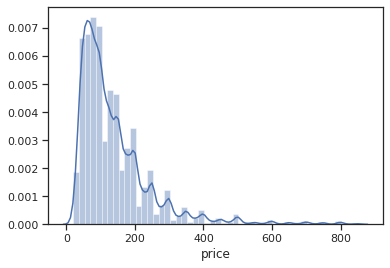

In [ ]:
sns.distplot(X_prep_df['price'])

Converting Price column into normal distribution using log function

In [ ]:
X_prep_df['price'] = np.log(X_prep_df['price'])

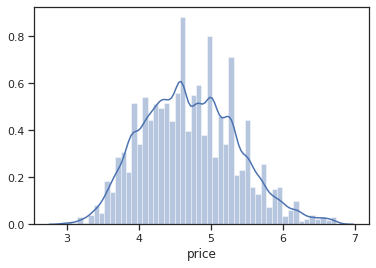

In [ ]:
sns.distplot(X_prep_df['price'])

In [ ]:
#N_SAMPLES = 1000
#size = (N_SAMPLES, 1)
#rng = np.random.RandomState(304)
#bc = PowerTransformer(method='box-cox')
# lognormal distribution
#X_lognormal = rng.lognormal(size=size)+6

In [ ]:
y = X_prep_df[['price']]
X = X_prep_df.drop(['price', 'price_scaled'], axis = 1)

y = np.array(y)


### Separating Data set into train and test

In [ ]:

# Train set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

## Decision Tree

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

### Validating Result

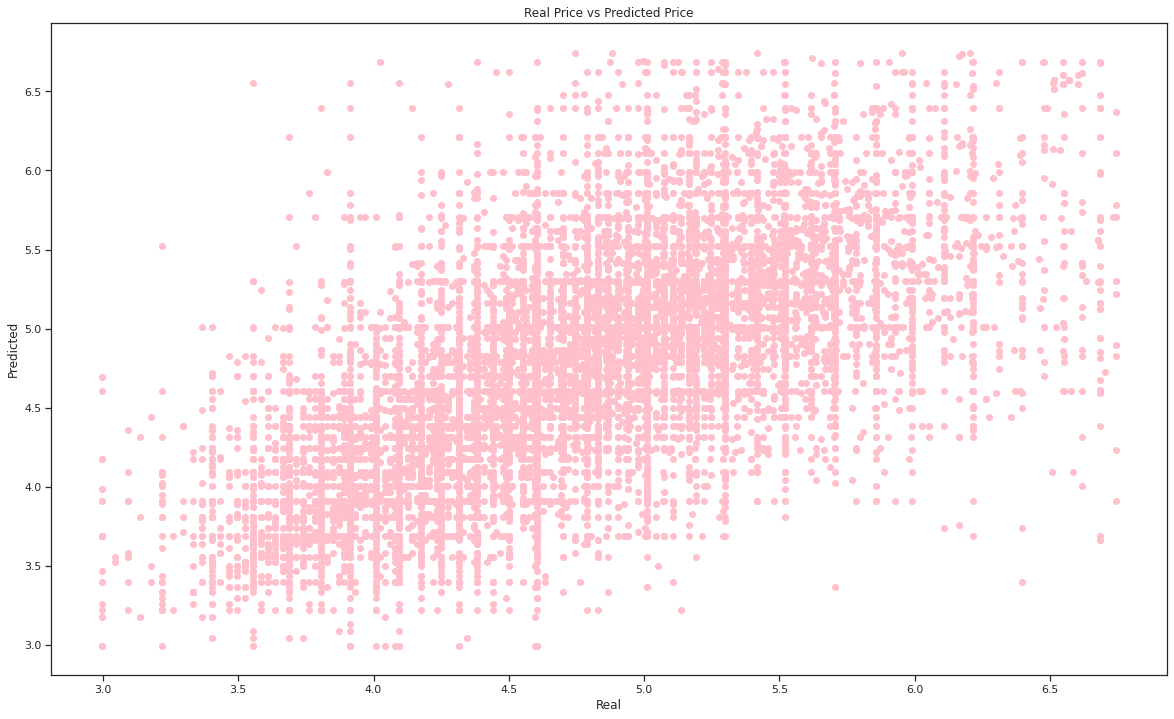

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred, color = 'pink')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.show()

In [ ]:
tmp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
tmp.tail(20)

,Actual,Predicted
16131,5.521461,4.859812
16132,4.605170,4.605170
16133,5.616771,5.703782
16134,4.317488,4.317488
16135,6.396930,5.075174
16136,5.075174,3.688879
16137,4.700480,5.010635
16138,4.941642,5.010635
16139,4.454347,4.605170
16140,4.867534,5.010635


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
rsqua = metrics.explained_variance_score(y_test, y_pred)
print(f'R')

MAE: 0.41152582938889626
MSE: 0.30485760522029054
RMSE: 0.552139117632767
R


## Random Forest 

In [ ]:
regressor = RandomForestRegressor(n_estimators = 800, random_state = 0)
regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Determine feature importance

In [ ]:

importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
             
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"%d. {X.columns[indices[f]]} feat#(%d) (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. Entire home/apt feat#(33) (0.412854)
2. Proximity_to_High Line feat#(15) (0.133838)
3. availability_365 feat#(4) (0.048423)
4. Distance_to_closest_station feat#(5) (0.036458)
5. reviews_per_month feat#(2) (0.032490)
6. minimum_nights feat#(0) (0.031578)
7. Proximity_to_Rockaway Beach feat#(19) (0.031259)
8. number_of_reviews feat#(1) (0.026426)
9. Distance_to_closest_airport feat#(6) (0.025526)
10. calculated_host_listings_count feat#(3) (0.017840)
11. Proximity_to_Statue of Liberty and Ellis Island feat#(21) (0.015509)
12. Proximity_to_Prospect Park feat#(13) (0.014726)
13. Proximity_to_Coney Island (including amusement parks and boardwalk) feat#(16) (0.011762)
14. Proximity_to_American Museum of Natural History feat#(20) (0.011317)
15. Proximity_to_Empire State Building feat#(22) (0.011225)
16. Proximity_to_South Street Seaport feat#(14) (0.010467)
17. Proximity_to_Central Park feat#(7) (0.010032)
18. Proximity_to_Metropolitan Museum of Art feat#(18) (0.009537)
19

In [ ]:
X_f_feat = []
for i in [5,10,15,20]:
  print(f'Sum of First {i} features explain {round(sum(importances[indices[0:i]])*100)}% of data')
  print('\tFeatures are:')
  for feat in range(i):
    print(f'\t\t{X.columns[indices[feat]]}')
    if i== 20:
      X_f_feat.append(X.columns[indices[feat]])

Sum of First 5 features explain 66.0% of data
	Features are:
		Entire home/apt
		Proximity_to_High Line
		availability_365
		Distance_to_closest_station
		reviews_per_month
Sum of First 10 features explain 80.0% of data
	Features are:
		Entire home/apt
		Proximity_to_High Line
		availability_365
		Distance_to_closest_station
		reviews_per_month
		minimum_nights
		Proximity_to_Rockaway Beach
		number_of_reviews
		Distance_to_closest_airport
		calculated_host_listings_count
Sum of First 15 features explain 86.0% of data
	Features are:
		Entire home/apt
		Proximity_to_High Line
		availability_365
		Distance_to_closest_station
		reviews_per_month
		minimum_nights
		Proximity_to_Rockaway Beach
		number_of_reviews
		Distance_to_closest_airport
		calculated_host_listings_count
		Proximity_to_Statue of Liberty and Ellis Island
		Proximity_to_Prospect Park
		Proximity_to_Coney Island (including amusement parks and boardwalk)
		Proximity_to_American Museum of Natural History
		Proximity_to_Empir

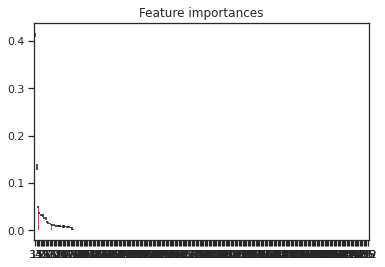

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)

### Validating Result

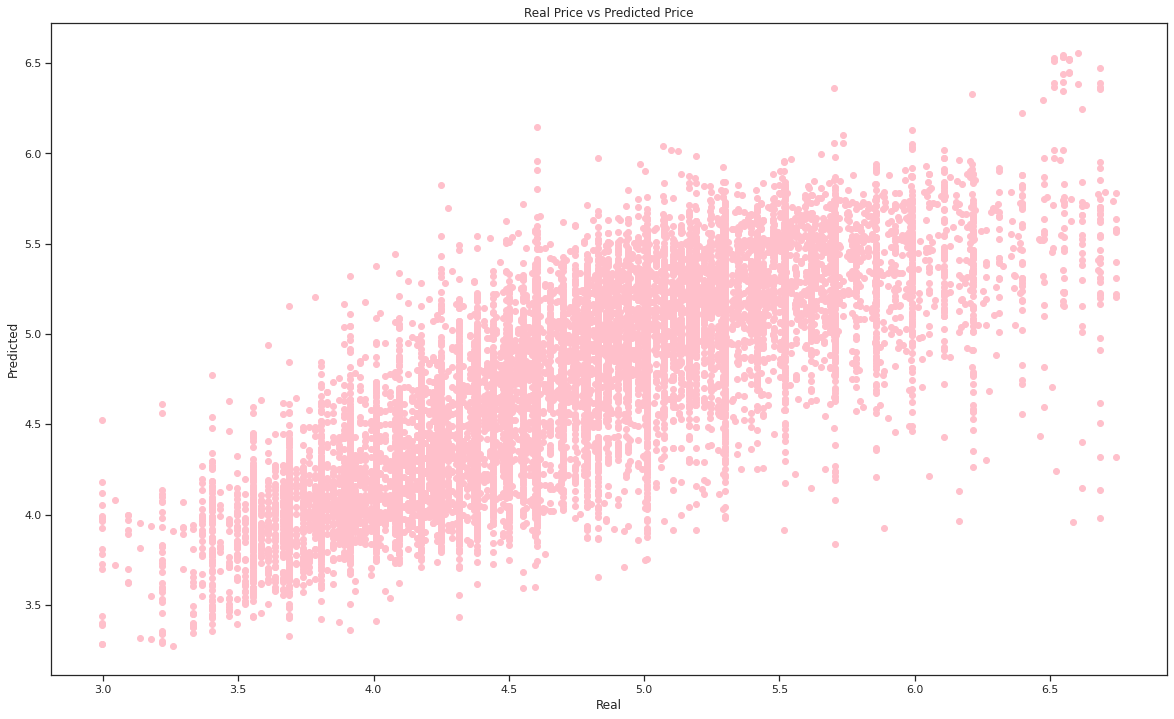

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred, color = 'pink')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.show()

In [ ]:
tmp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
tmp.tail(20)

,Actual,Predicted
16131,5.521461,5.143640
16132,4.605170,4.705464
16133,5.616771,5.652728
16134,4.317488,4.271664
16135,6.396930,5.308601
16136,5.075174,4.575774
16137,4.700480,4.722465
16138,4.941642,4.634729
16139,4.454347,4.778183
16140,4.867534,4.998639


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
rsqua = metrics.explained_variance_score(y_test, y_pred)
print(f'RS:{rsqua}')

MAE: 0.2948910627275947
MSE: 0.1553235984640897
RMSE: 0.39411114988552365
RS:0.6431526336247093


In [ ]:
# Lasso

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_lasso = Lasso()
model_ridge=Ridge()
model_en = ElasticNet()
model_gbm = GradientBoostingRegressor()


In [ ]:
model_lasso.fit(X_train, y_train.ravel())
model_ridge.fit(X_train, y_train.ravel())
model_en.fit(X_train, y_train.ravel())
model_gbm.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred_lasso = model_lasso.predict(X_test)
y_pred_en = model_en.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_gbm = model_gbm.predict(X_test)


In [ ]:

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print(f'RMSE - Lasso: {rmse}')


rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_en))
print(f'RMSE - Elastic Net: {rmse}')


rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print(f'RMSE - Lasso: {rmse}')

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbm))
print(f'RMSE - gbm: {rmse}')

RMSE - Lasso: 0.6597519279032673
RMSE - Elastic Net: 0.6597519279032673
RMSE - Lasso: 0.42406821701386666
RMSE - gbm: 0.40376330136682387


## Random Forest. First 20 features

In [ ]:
X_20_feat = X[X_f_feat]

In [ ]:

# Train set split
X_train, X_test, y_train, y_test = train_test_split(X_20_feat, y, test_size=1/3, random_state=0)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 800, random_state = 0)
regressor.fit(X_train, y_train.ravel())
y_pred = regressor.predict(X_test)

In [ ]:
regressor_test = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor_test.fit(X_train, y_train.ravel())
y_pred = regressor_test.predict(X_test)

### Validating Results

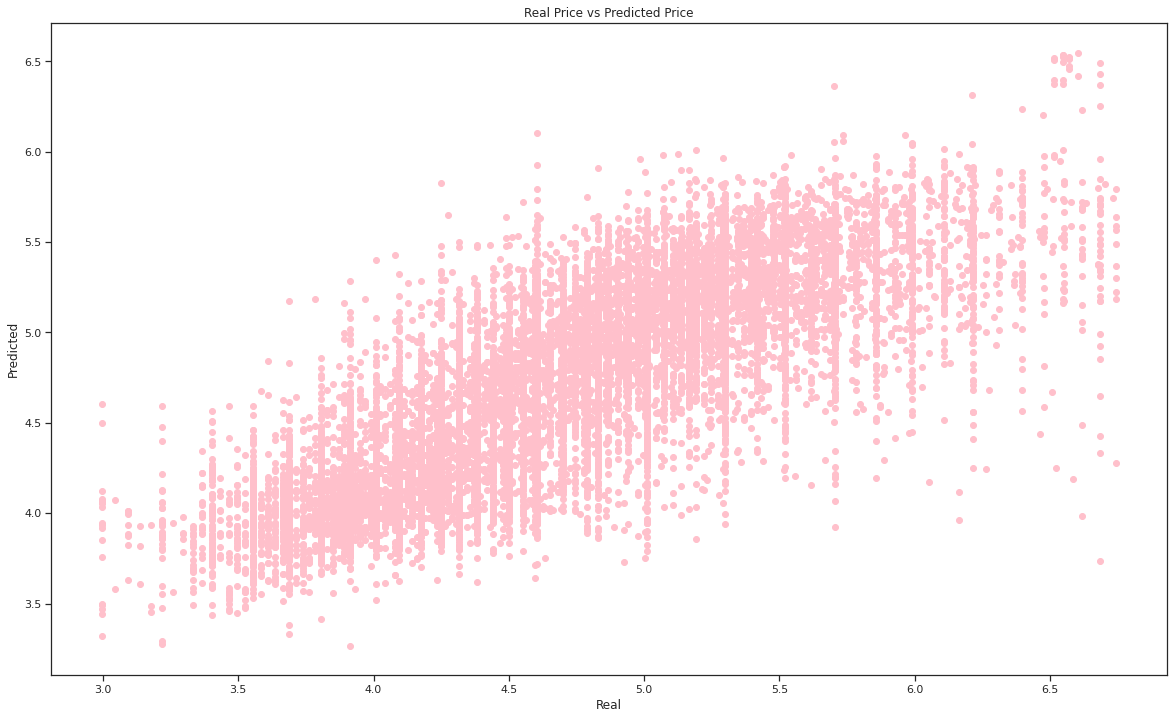

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred, color = 'pink')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.show()

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
rsqua = metrics.explained_variance_score(y_test, y_pred)
print(f'RS:{rsqua}')

MAE: 0.2972444940118151
MSE: 0.15667364793656763
RMSE: 0.3958202217378082
RS:0.6400629835886698


In [ ]:

def rmse_cv_(kf, model, X_data, y_data):
  #kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(X_20_feat)
  rmse = np.sqrt(-cross_val_score(regressor, X_data.values, y_data.ravel(), scoring='neg_mean_squared_error', cv=kf))
  return rmse

In [ ]:
kf = 3
score = rmse_cv_(kf, regressor_test, X_train[:10000], y_train[:10000])

In [ ]:
score.mean()
#score.std()
print(f"Mean {kf}-Fold R Squared: {score}")

0.4052831372469368

### Grid Search

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressor_test.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80, 100]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 35,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 40}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train.ravel())
base_accuracy = evaluate(base_model, X_test, y_test.ravel())

Model Performance
Average Error: 0.3109 degrees.
Accuracy = 93.38%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test.ravel())

Model Performance
Average Error: 0.2986 degrees.
Accuracy = 93.66%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.29%.


## Random Forest. First 15 features

In [ ]:
X_15_feat = X[X_f_feat[0:15]]

In [ ]:

# Train set split
X_train, X_test, y_train, y_test = train_test_split(X_15_feat, y, test_size=1/3, random_state=0)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 800, random_state = 0)
regressor.fit(X_train, y_train.ravel())
y_pred = regressor.predict(X_test)

### Validating Results

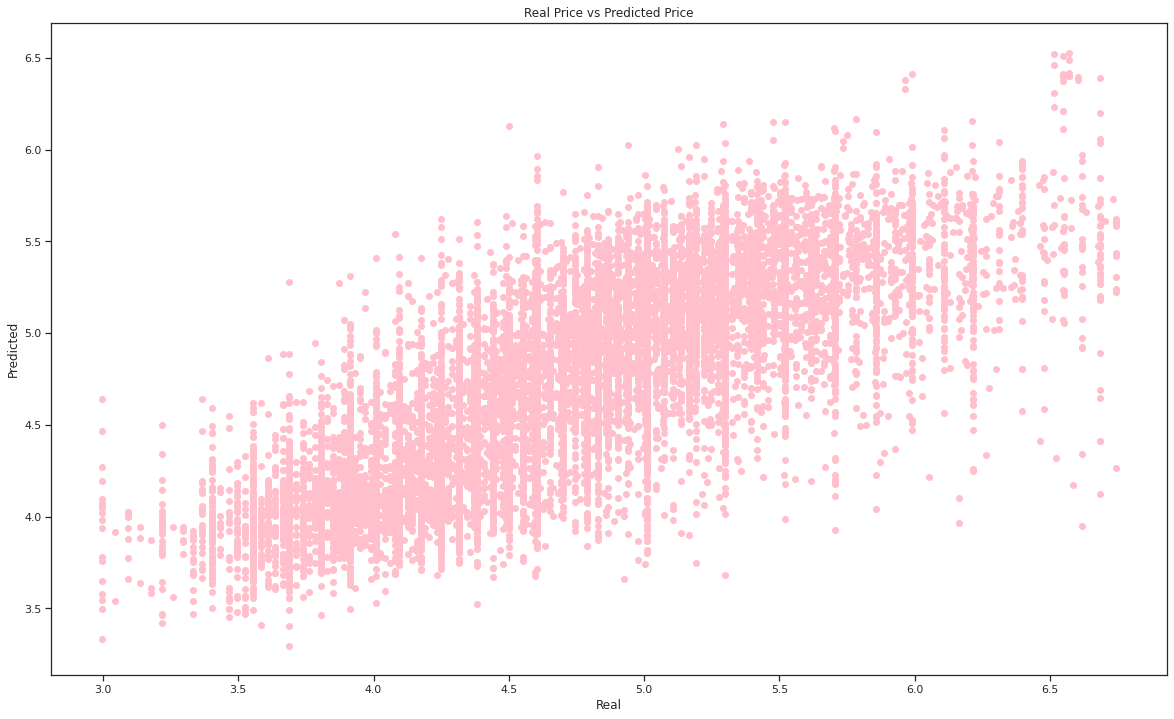

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred, color = 'pink')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.show()

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
rsqua = metrics.explained_variance_score(y_test, y_pred)
print(f'RS:{rsqua}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R 2. Coefficient of determination:{r2}')

MAE: 0.306417822027968
MSE: 0.16532153032771302
RMSE: 0.40659750408446066
RS:0.6202011747971691
R 2. Coefficient of determination:0.6201818458138573


## Linear Regression

In [ ]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predictions 
y_pred = lin_regressor.predict(X_test)
y_pred

array([[5.19809926],
       [5.30996874],
       [4.07387662],
       ...,
       [4.18417629],
       [4.15153504],
       [3.97509172]])

In [ ]:
tmp = pd.DataFrame({'Actual': y_test['price'], 'Predicted': y_pred.flatten()})
tmp.tail(20)

IndexError: ignored

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


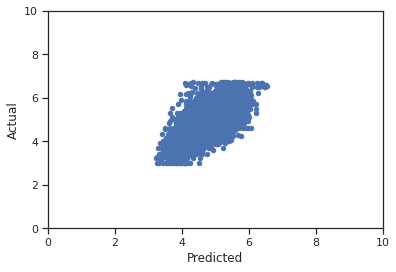

In [ ]:
tmp.plot(y='Actual', x="Predicted",kind='scatter')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
rsqua = metrics.explained_variance_score(y_test, y_pred)
print(f'R')

MAE: 0.3322209938137197
MSE: 0.19398912864491086
RMSE: 0.44044196966786764
R


## Polinomial Linear Regression

In [ ]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly= poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
lin_regressor2 = LinearRegression()
lin_regressor2.fit(X_train, y_train)
y_pred = lin_regressor2.predict(X_test)

### Validating Result

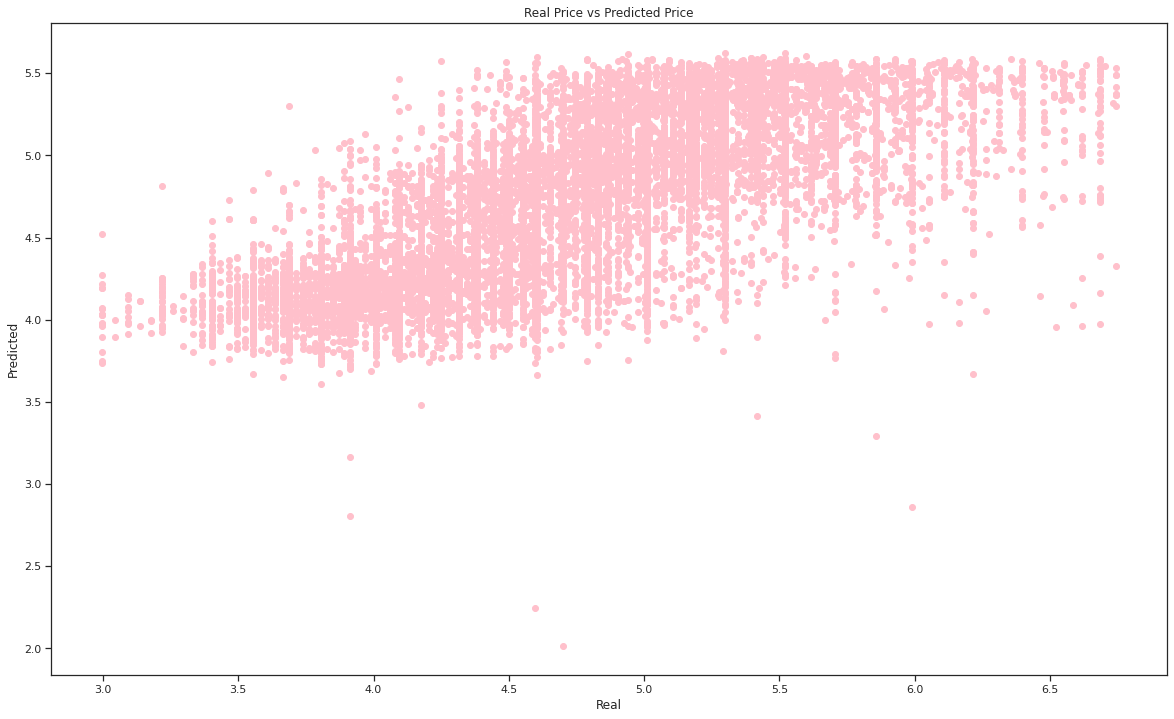

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred, color = 'pink')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.show()

In [ ]:
tmp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
tmp.tail(20)

,Actual,Predicted
16131,5.521461,5.084925
16132,4.605170,4.808036
16133,5.616771,5.311810
16134,4.317488,3.882775
16135,6.396930,5.192923
16136,5.075174,4.867544
16137,4.700480,4.614289
16138,4.941642,4.532703
16139,4.454347,4.754195
16140,4.867534,4.952571


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
rsqua = metrics.explained_variance_score(y_test, y_pred)
print(f'R')

MAE: 0.3322209938137197
MSE: 0.19398912864491086
RMSE: 0.44044196966786764
R


## SVR Model

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)

### Validating Result

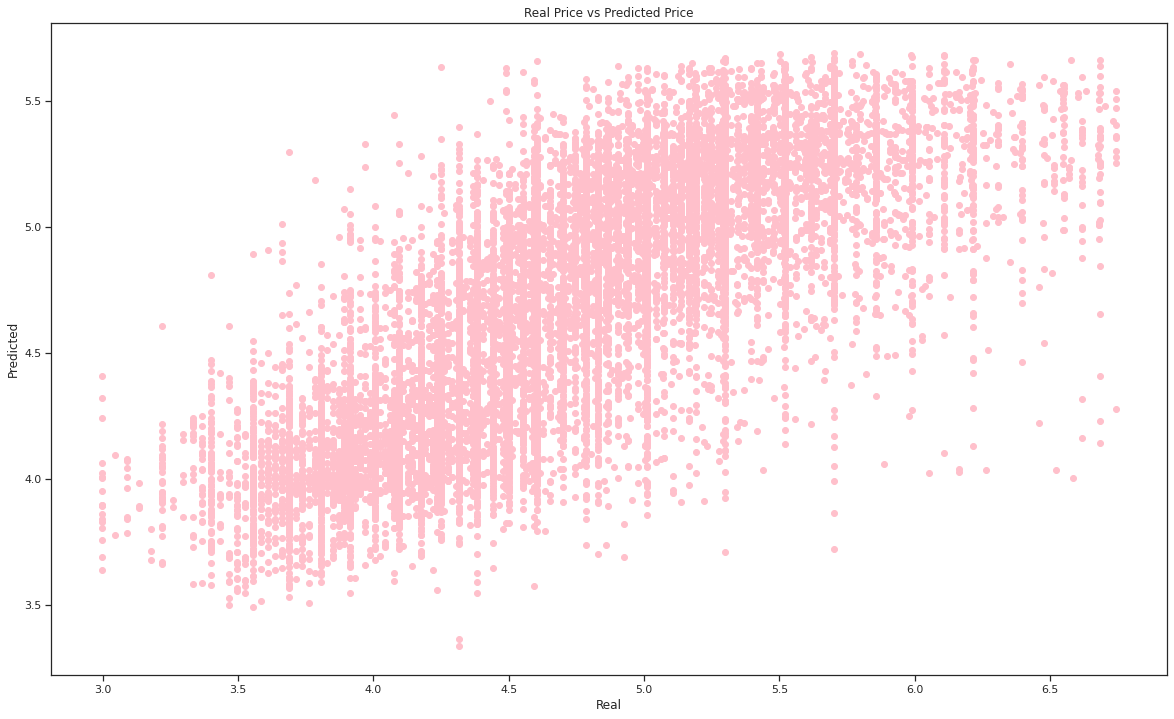

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred, color = 'pink')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.show()

In [ ]:
tmp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
tmp.tail(20)

,Actual,Predicted
16131,5.521461,5.166727
16132,4.605170,4.969547
16133,5.616771,5.415152
16134,4.317488,4.123474
16135,6.396930,5.264476
16136,5.075174,4.702328
16137,4.700480,4.750889
16138,4.941642,4.453464
16139,4.454347,4.606860
16140,4.867534,4.972820


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
rsqua = metrics.explained_variance_score(y_test, y_pred)
print(f'R')

MAE: 0.313352742542656
MSE: 0.17603252156046859
RMSE: 0.41956229759175045
R


## Show the dataset

In [ ]:
[]
df_air[['price', 'Distance_to_closest_station', 'Proximity_to_Central Park', 'Proximity_to_Times Square', 'Proximity_to_Grand Central Terminal', 'Proximity_to_Theater District (including Broadway theatres)',
       'Proximity_to_Rockefeller Center (including Top of the Rock)', 'Proximity_to_Bryant Park', 'Proximity_to_Prospect Park', 'Proximity_to_South Street Seaport', 'Proximity_to_High Line', 
       'Proximity_to_Coney Island (including amusement parks and boardwalk)', 'Proximity_to_National September 11 Memorial', 'Proximity_to_Metropolitan Museum of Art',
       'Proximity_to_Rockaway Beach', 'Proximity_to_American Museum of Natural History', 'Proximity_to_Statue of Liberty and Ellis Island', 'Proximity_to_Empire State Building',
       'Proximity_to_National September 11 Museum', 'Proximity_to_Museum of Modern Art', 'Proximity_to_One World Trade Center']]

In [ ]:
attract

## Prep that was done one time, downloaded and used as an input

This section is only performed if ataset is freshly downloaded from Keggle. I suggest saving the result as a separate dataset, as this code takes a few hours to execute; however, as would be shown later, it generates a very powerful feature - proximity to the closest subway station

In [ ]:
# reading the original dataset
"""
df_air = pd.read_csv("drive/My Drive/Colab Notebooks/Open AirBnb data/AB_NYC_2019.csv")
df_air.head(10)"""

'\ndf_air = pd.read_csv("drive/My Drive/Colab Notebooks/Open AirBnb data/AB_NYC_2019.csv")\ndf_air.head(10)'

### NYC subway Dataset

https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja/

The following dataset is taken from NYC Government. It includes information on Entrance and Exit locations, which would use to determine, which one of these stations is the closest one. 

In [ ]:
nyc_subway_df = pd.read_csv("drive/My Drive/Colab Notebooks/Open AirBnb data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv")
nyc_subway_df.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [ ]:
nyc_subway_df.columns

Index(['Division', 'Line', 'Station Name', 'Station Latitude',
       'Station Longitude', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Route6', 'Route7', 'Route8', 'Route9', 'Route10', 'Route11',
       'Entrance Type', 'Entry', 'Exit Only', 'Vending', 'Staffing',
       'Staff Hours', 'ADA', 'ADA Notes', 'Free Crossover',
       'North South Street', 'East West Street', 'Corner', 'Entrance Latitude',
       'Entrance Longitude', 'Station Location', 'Entrance Location'],
      dtype='object')

In [ ]:
nyc_subway_df.shape

(1868, 32)

### Proximity to Subway Station

We are going to be using Geodesic function in orer to determine the distance between two points by their coordinates. This function takes coordinates in the format of touple pair, the following lambda function creates a new column containning latitude and longitude in the correct format

In [ ]:
df_air['Listing_Location']=df_air[['latitude','longitude']].apply(lambda x : (x['latitude'],x['longitude']),axis=1)

In [ ]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Listing_Location
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,"(40.647490000000005, -73.97237)"
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,"(40.75362, -73.98376999999999)"
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,"(40.809020000000004, -73.9419)"
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,"(40.685140000000004, -73.95976)"
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,"(40.79851, -73.94399)"


The following code determines the closest station to every listing. First we start off by creating two placeholder columns "Distance to closest station" and "Station Name". Station name is not going to be used, so it could be skipped. As an idea, you may grab a Route names as well to determine if the Route could be significant for some tourists. I did not consider Routes important since most of them run through Manhattan anyway (however some may not run to the airport)

In [ ]:
# Distance between two points
df_air['Distance_to_closest_station'] = np.zeros((df_air.shape[0],1))
df_air['Closest_station'] = np.zeros((df_air.shape[0],1))


for air in range(df_air.shape[0]): # for every listing 
  min_dist = [9999,''] #creating a dummy distance (very large), station name
  for stat in range(nyc_subway_df.shape[0]): # check distance to every station
    dist_to_check = geodesic(df_air['Listing_Location'][air], nyc_subway_df['Entrance Location'][stat]).miles
    if dist_to_check < min_dist[0]: # if the distance to the current station is less than minimum distance in the dummy list
      min_dist[0] = dist_to_check # assign these to the dummy list
      min_dist[1] = nyc_subway_df['Station Name'][stat]
  df_air.loc[air, 'Distance_to_closest_station'] = min_dist[0] # after the loop with stations is finished
  df_air.loc[air, 'Closest_station'] = min_dist[1] # we assign resulting dummies to the current station
  if air % 100 == 0: # because this code takes a few hours to execute (looking through all listings and all stations for each one)
    print(df_air.shape[0] - air) # this statement executes every 100 listings printing how many listings remaining until the end

  

48895
48795
48695
48595
48495
48395
48295
48195
48095
47995
47895
47795
47695
47595
47495
47395
47295
47195
47095
46995
46895
46795
46695
46595
46495
46395
46295
46195
46095
45995
45895
45795
45695
45595
45495
45395
45295
45195
45095
44995
44895
44795
44695
44595
44495
44395
44295
44195
44095
43995
43895
43795
43695
43595
43495
43395
43295
43195
43095
42995
42895
42795
42695
42595
42495
42395
42295
42195
42095
41995
41895
41795
41695
41595
41495
41395
41295
41195
41095
40995
40895
40795
40695
40595
40495
40395
40295
40195
40095
39995
39895
39795
39695
39595
39495
39395
39295
39195
39095
38995
38895
38795
38695
38595
38495
38395
38295
38195
38095
37995
37895
37795
37695
37595
37495
37395
37295
37195
37095
36995
36895
36795
36695
36595
36495
36395
36295
36195
36095
35995
35895
35795
35695
35595
35495
35395
35295
35195
35095
34995
34895
34795
34695
34595
34495
34395
34295
34195
34095
33995
33895
33795
33695
33595
33495
33395
33295
33195
33095
32995
32895
32795
32695
32595
32495
32395
3229

Saving and downloading resulting dataset. The rest of the code would use this dataset as the starting point

In [ ]:
#writer = pd.ExcelWriter('Open_Airbnb_ver.1.xlsx')
#df_air.to_excel(writer)
#writer.save()
writer = df_air.to_csv('Open_Airbnb_ver.1.csv', index=False)


In [ ]:
files.download('Open_Airbnb_ver.1.csv')
files.download('Open_Airbnb_ver.1.xlsx')
